In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset, random_split,Subset
torch.manual_seed(0)

## Data Explore

In [2]:
data = pd.read_csv("climate_data.csv") 
data.head()

# defined target variable temperature 
# diff_pressure = max_pressure - min_pressure
# definiation of other variables refer to Kaggle
# kaggle data link https://www.kaggle.com/datasets/mastmustu/weather-analysis

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0,...,4.0,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0,...,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0,...,8.0,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0,...,7.0,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0,...,5.0,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665


In [3]:
print(data.loc[data["Date"] != data["Date1"]])

Empty DataFrame
Columns: [Date, Average temperature (°F), Average humidity (%), Average dewpoint (°F), Average barometer (in), Average windspeed (mph), Average gustspeed (mph), Average direction (°deg), Rainfall for month (in), Rainfall for year (in), Maximum rain per minute, Maximum temperature (°F), Minimum temperature (°F), Maximum humidity (%), Minimum humidity (%), Maximum pressure, Minimum pressure, Maximum windspeed (mph), Maximum gust speed (mph), Maximum heat index (°F), Date1, Month, diff_pressure]
Index: []

[0 rows x 23 columns]


In [4]:
data= data.drop('Date1',axis =1)

In [5]:
data.isnull().sum()

Date                        0
Average temperature (°F)    0
Average humidity (%)        0
Average dewpoint (°F)       0
Average barometer (in)      0
Average windspeed (mph)     0
Average gustspeed (mph)     0
Average direction (°deg)    0
Rainfall for month (in)     0
Rainfall for year (in)      0
Maximum rain per minute     0
Maximum temperature (°F)    0
Minimum temperature (°F)    0
Maximum humidity (%)        0
Minimum humidity (%)        0
Maximum pressure            0
Minimum pressure            0
Maximum windspeed (mph)     0
Maximum gust speed (mph)    0
Maximum heat index (°F)     0
Month                       0
diff_pressure               0
dtype: int64

In [6]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)  

In [7]:
data.head()

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Month,diff_pressure
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0,...,34.0,4.0,27.0,29.762,29.596,41.4,59.0,40.0,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0,...,37.0,4.0,16.0,29.669,29.268,35.7,51.0,52.0,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0,...,6.0,8.0,35.0,30.232,29.260,25.3,38.0,41.0,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0,...,-0.0,7.0,35.0,30.566,30.227,12.7,20.0,32.0,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0,...,15.0,5.0,13.0,30.233,29.568,38.0,53.0,32.0,1,0.665


In [8]:
data.iloc[:,1:11].describe()

,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),Maximum rain per minute
count,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.0
mean,44.670733,48.878011,23.127037,29.881420,5.758893,10.011968,216.037417,0.451105,5.486171,0.0
std,15.326793,17.438153,14.634088,0.250395,4.022485,14.117446,97.677761,0.603462,4.534444,0.0
min,-12.100000,9.000000,-22.200000,28.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,33.700000,36.000000,12.100000,29.700000,2.700000,4.500000,116.000000,0.050000,0.980000,0.0
50%,45.100000,47.000000,22.500000,29.900000,4.600000,7.100000,253.000000,0.220000,5.080000,0.0
75%,58.000000,61.000000,35.400000,30.000000,8.000000,12.100000,282.000000,0.670000,9.047500,0.0
max,76.300000,94.000000,55.100000,31.000000,26.400000,240.400000,360.000000,4.480000,16.410000,0.0


In [9]:
data.iloc[:,11:].describe()

,Maximum temperature (°F),Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Month,diff_pressure
count,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000
mean,57.561661,31.227524,73.673757,26.016914,30.045451,29.701622,19.840748,33.974910,58.086315,6.395695,0.343829
std,17.755874,14.124424,20.380611,15.623870,0.258140,0.451691,12.235410,38.632424,17.953453,3.430231,0.407499
min,-6.100000,-27.700000,1.000000,0.000000,29.338000,13.266000,0.000000,0.000000,-6.100000,1.000000,0.000000
25%,43.900000,23.000000,63.000000,15.000000,29.866000,29.562000,13.800000,19.600000,43.900000,3.000000,0.220000
50%,57.250000,32.800000,81.000000,22.000000,30.016000,29.711000,18.400000,27.600000,57.200000,6.000000,0.293000
75%,73.200000,41.800000,89.000000,32.000000,30.203000,29.869000,24.200000,34.500000,77.300000,9.000000,0.395000
max,92.700000,65.700000,100.000000,90.000000,31.204000,30.855000,181.700000,255.300000,88.400000,12.000000,16.602000


In [9]:
data['Maximum rain per minute'].value_counts()  # all zero for this variable, need to delete the variable 

0.0    3902
Name: Maximum rain per minute, dtype: int64

Text(0.5, 1.0, 'Average Temperature')

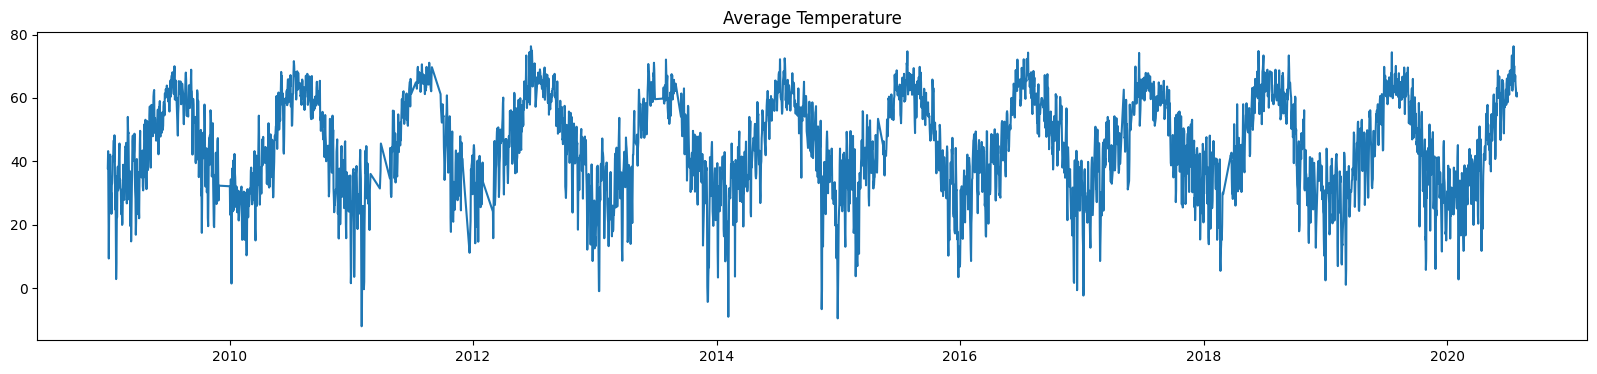

In [10]:
plt.figure(figsize=(20,4))
plt.plot(data['Date'],data['Average temperature (°F)'])
plt.title('Average Temperature')

In [11]:
columns=['Average temperature (°F)', 'Average humidity (%)',
       'Average dewpoint (°F)', 'Average barometer (in)',
       'Average windspeed (mph)', 'Average gustspeed (mph)',
       'Average direction (°deg)', 'Rainfall for month (in)',
       'Rainfall for year (in)', 'Maximum temperature (°F)', 'Minimum temperature (°F)',
       'Maximum humidity (%)', 'Minimum humidity (%)', 'Maximum pressure',
       'Minimum pressure', 'Maximum windspeed (mph)',
       'Maximum gust speed (mph)', 'Maximum heat index (°F)', 'diff_pressure']

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

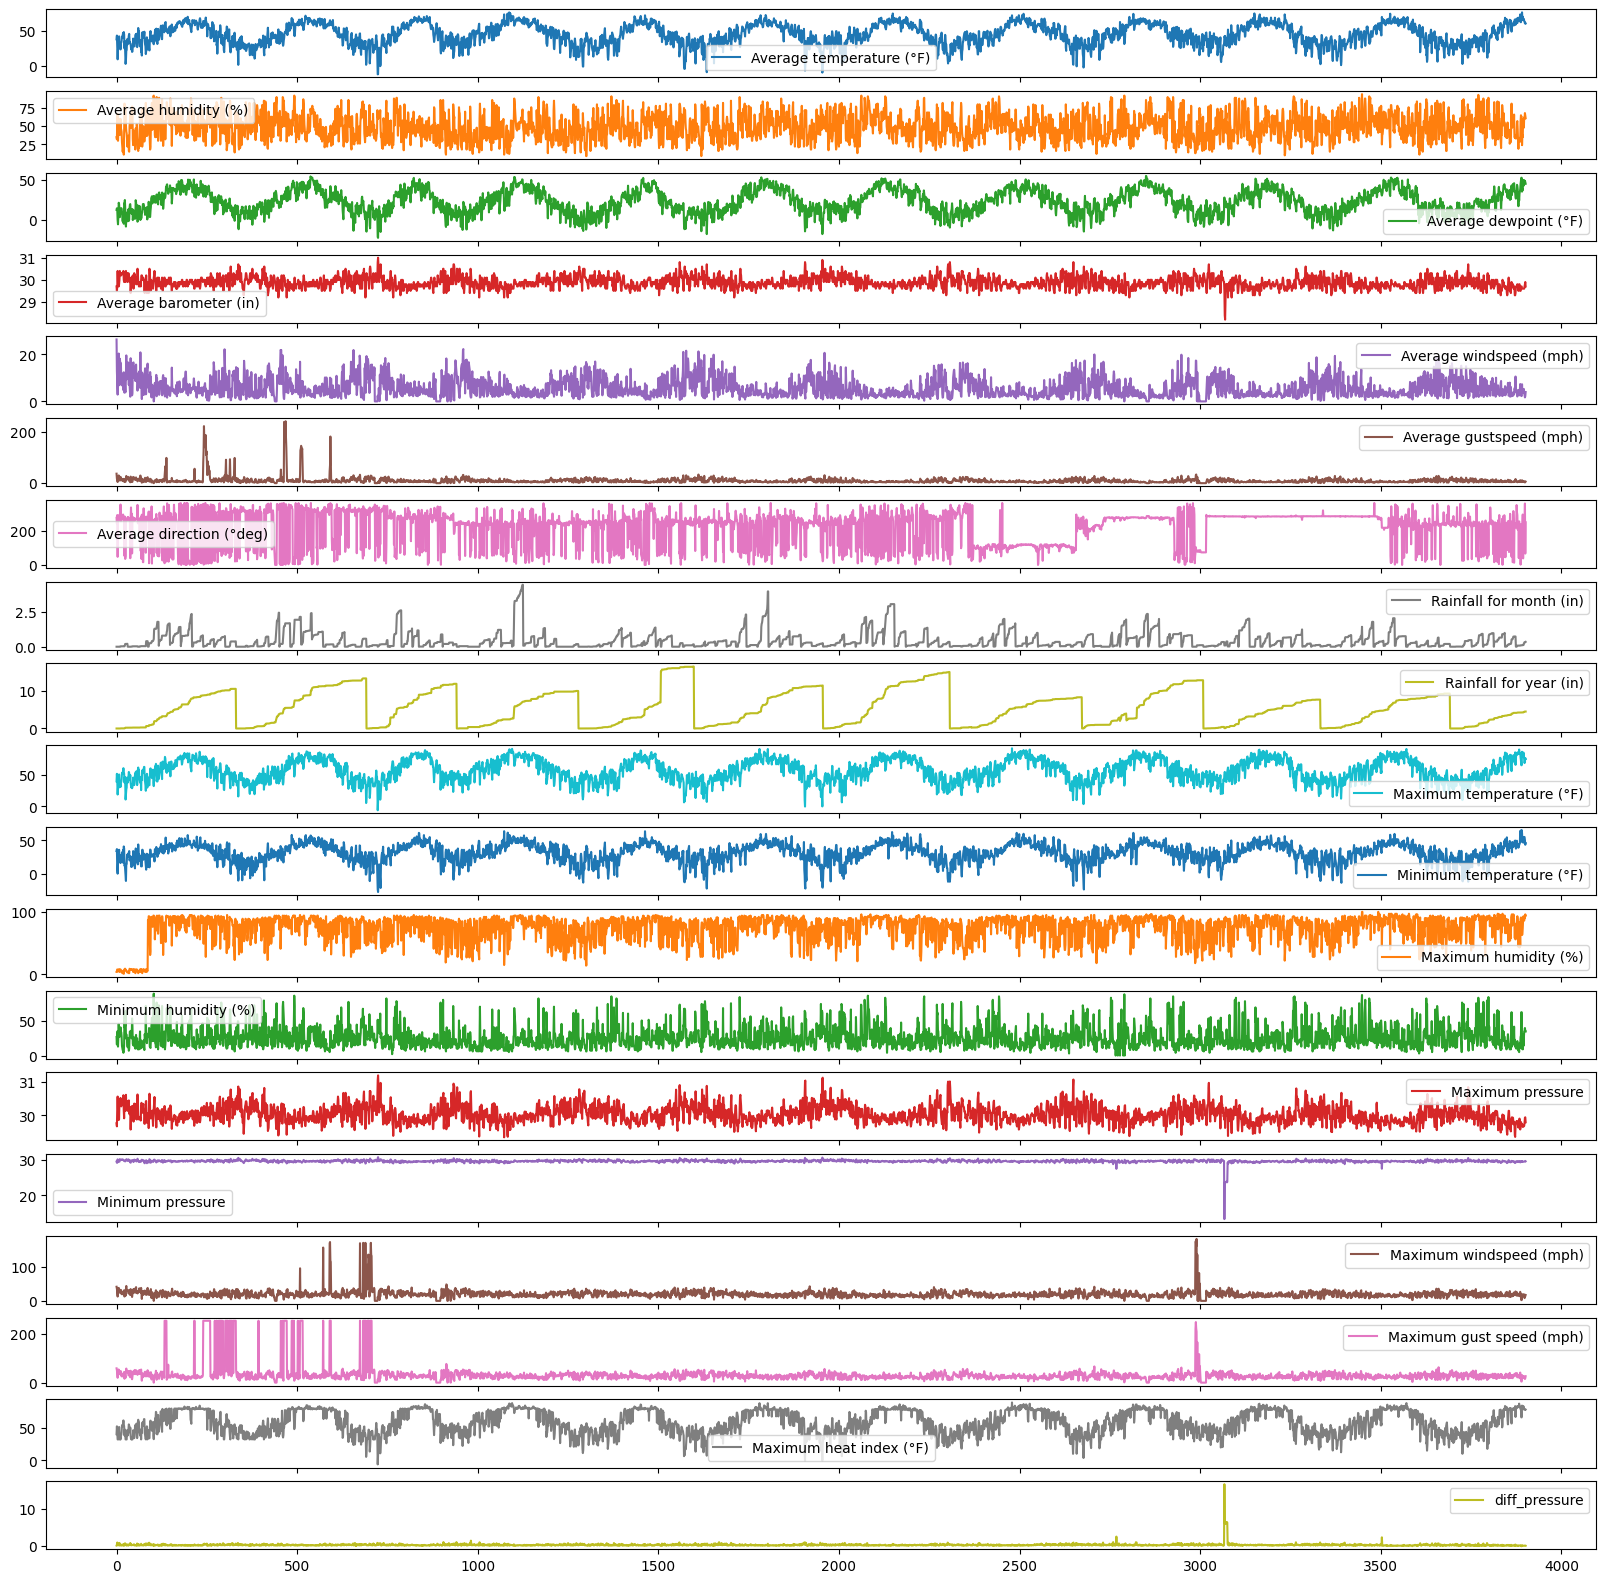

In [12]:
#plt.figure(figsize=(20,50)) #Set the figure size
plt.rcParams['figure.figsize'] = (20,20) 
data[columns].plot(subplots = True) #Plot all the variables

Many variables have seasonality, 'average dewpoint' and 'maximum heat index' have similar seasonal pattern as average temperature.

In [13]:
def heatmapper(data, corr_type='pearson'):
    corr_data = data.corr(method=corr_type)
    mask = np.triu(np.ones_like(corr_data, dtype='bool'))
    
    # create a line graph of correlations vs the target variable
    bar_data = corr_data['Average temperature (°F)'].reset_index()
    bar_data.columns = ['feature', 'correlation']
    bar_data = bar_data[bar_data['feature'] != 'Average temperature (°F)'].sort_values(by='correlation', ascending=True)
    
    # plot both the graphs
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    sns.heatmap(corr_data, mask=mask, cmap='viridis', ax=ax1)
    sns.barplot(x='feature', y='correlation', data=bar_data, palette='viridis', ax=ax2)
    ax2.set_xticklabels(bar_data['feature'], rotation=90)
    ax1.set_title(f'{corr_type} correlation to price')
    ax2.set_title(f'{corr_type} correlation between features and temperature')
    plt.show()

In [14]:
# delete variables 'Average direction (°deg)', 'Maximum rain per minute' 
variables=['Average temperature (°F)', 'Average humidity (%)',
       'Average dewpoint (°F)', 'Average barometer (in)','Maximum temperature (°F)', 'Minimum temperature (°F)',
       'Average windspeed (mph)', 'Average gustspeed (mph)','Rainfall for month (in)',
       'Rainfall for year (in)', 'Maximum humidity (%)', 'Minimum humidity (%)', 'Maximum pressure',
       'Minimum pressure', 'Maximum windspeed (mph)',
       'Maximum gust speed (mph)', 'Maximum heat index (°F)', 'diff_pressure','Month']
features = ['Average humidity (%)',
       'Average dewpoint (°F)', 'Average barometer (in)','Maximum temperature (°F)', 'Minimum temperature (°F)',
       'Average windspeed (mph)', 'Average gustspeed (mph)','Rainfall for month (in)',
       'Rainfall for year (in)', 'Maximum humidity (%)', 'Minimum humidity (%)', 'Maximum pressure',
       'Minimum pressure', 'Maximum windspeed (mph)',
       'Maximum gust speed (mph)', 'Maximum heat index (°F)','diff_pressure']

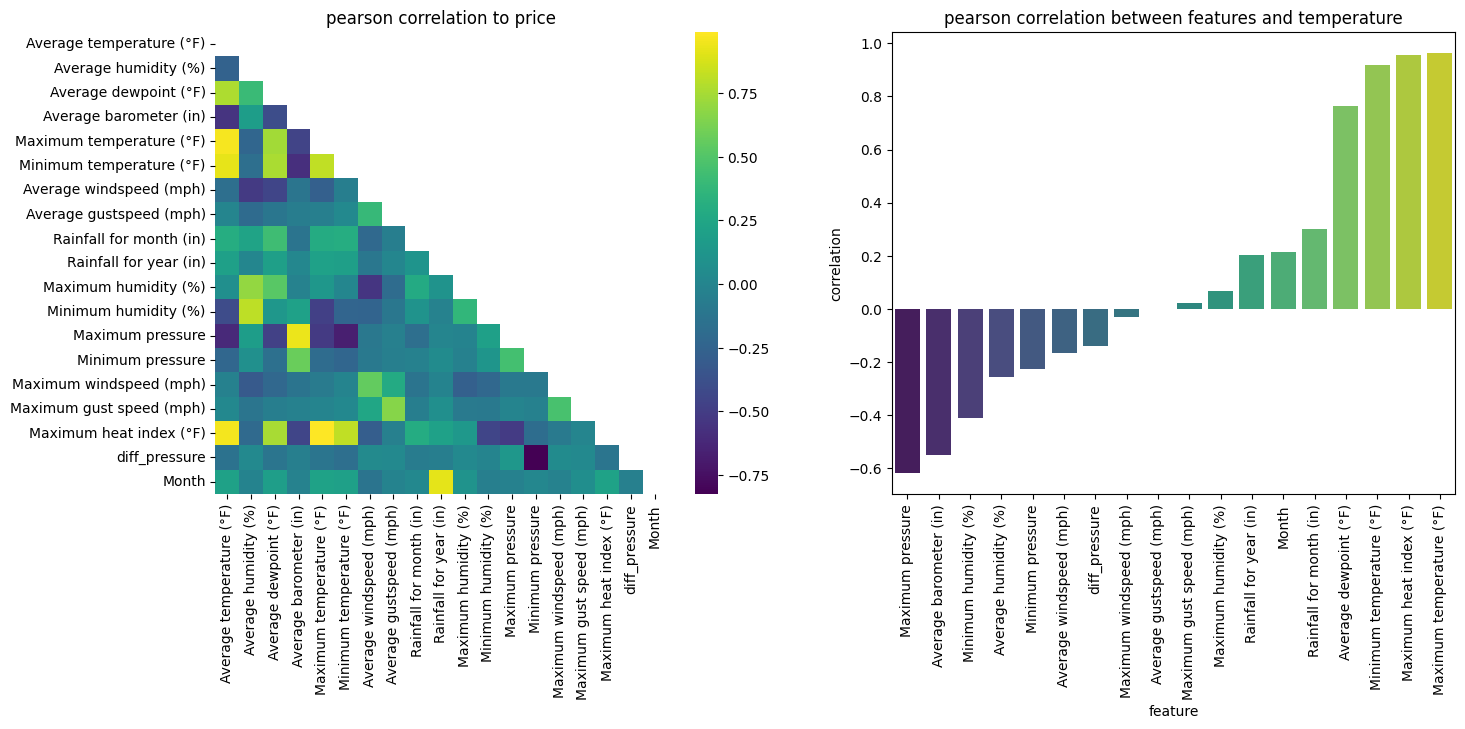

In [15]:
heatmapper(data[variables], corr_type='pearson')

# Data preprocessing

In [152]:
#X_train, X_eval, y_train, y_eval = train_test_split(data[variables], data['Average temperature (°F)'], test_size=0.2, random_state=66)

In [16]:
# 5-day prediction using 30 days data
length = 30
step = 1 
n_future = 1

X = data[variables]
scaler1 = StandardScaler()
X = scaler1.fit_transform(X)
Y = data['Average temperature (°F)']
x_set = []
y_set = []

for i in range(0, len(X) - length - n_future + 1):
    x_set.append(X[i : i + length])
    y_set.append(Y[i + length  : i +  length + n_future])
    
x_set , y_set = np.array(x_set), np.array(y_set)
y_set = np.reshape(y_set, (y_set.shape[0], y_set.shape[1],1))

# shape of x_set (3872, 30, 19)
# shape of y_set (3872, 1, 1)

In [84]:
len(data)

3902

In [40]:
y_set.shape

(3872, 1, 1)

In [39]:
x_set.shape

(3872, 30, 19)

In [58]:
def Transform_Data(x_set, y_set):
    
    X_tensor = torch.from_numpy(x_set).type(torch.float) 
    Y_tensor = torch.from_numpy(y_set).type(torch.float)
    dataset = TensorDataset(X_tensor, Y_tensor)
    
    batch_size=30
    train_set_size = int(len(x_set) * 0.8)
    test_set_size = len(x_set) - train_set_size
    
    cut = int(len(dataset)*0.8)
    train_set = Subset(dataset, np.arange(cut)) 
    test_set = Subset(dataset, np.arange(cut,len(dataset))) 
    train_loader = DataLoader(train_set, batch_size, shuffle=False) # false 
    test_loader = DataLoader(test_set,batch_size)
    
    return train_set,test_set,train_loader,test_loader 

In [63]:
train_set,test_set,train_loader,test_loader = Transform_Data(x_set, y_set) 

In [60]:
len(train_loader.dataset)

3097

In [61]:
len(test_loader.dataset)

775

# LSTM Structure

In [36]:
## 4. sequence daraloader 

class LSTM(nn.Module):
    def __init__(self,input_size,hidden_size):  
        super(LSTM, self).__init__()
        self.LSTM = nn.LSTM(input_size = input_size,
                                hidden_size = hidden_size, # 32 64 
                                num_layers= 2,
                                batch_first=True,
                                bidirectional = False) 
        self.linear1 = nn.Linear(480,100) 
        self.linear2 = nn.Linear(100,1) 
        self.Tanh= torch.nn.Tanh()
            
    def forward(self,data):
    
        output,_ = self.LSTM(data) 
        output_reshape = output.reshape(output.size(0),-1)
        output1 = self.linear1(output_reshape)
        output1 = self.Tanh(output1)
        output2 = self.linear2(output1)
        output2 = torch.unsqueeze(output2, dim=2)
        
        return output2

In [37]:
def train(model,optimizer,dataloader):
    """
    This function is used to train on training set for one epoch 
    """
    size = len(dataloader.dataset) 
    loss_fn = nn.MSELoss() # lost function to be MSE 
    model.train()
    train_loss=0  
    
    for batch, (X, y) in enumerate(dataloader):
    
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss+= loss.item()
        
    return  train_loss/len(dataloader) # len(train_loader) = 31 

def validation(model,dataloader):
    """
    This function is used to validate on validation set for one epoch 
    """
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    loss_fn=nn.MSELoss()
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            val_loss += loss_fn(pred, y).item()
        
    val_loss /= num_batches
    
    return val_loss


def plot_loss(train_loss,val_loss):
    """
    You may end up plotting the training loss and validation loss multiple times
    It is better to implement a plot function instead of rewriting the plotting steps
    """
    X=range(1,len(train_loss)+1)
    plt.plot(X,train_loss,"-b",label="Train")
    plt.plot(X,val_loss,"-r",label="Val")
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

# Model Train

for epoch 1, train loss is 1493.73229936453
for epoch 1, validation loss is 1138.4505480252778
for epoch 2, train loss is 848.7737927803627
for epoch 2, validation loss is 709.3779930701622
for epoch 3, train loss is 532.5696328970103
for epoch 3, validation loss is 475.43187948373645
for epoch 4, train loss is 366.3213929763207
for epoch 4, validation loss is 356.00949067335864
for epoch 5, train loss is 285.7446905649625
for epoch 5, validation loss is 299.82956049992487
for epoch 6, train loss is 250.09927756969745
for epoch 6, validation loss is 275.38044415987457
for epoch 7, train loss is 235.68032638843243
for epoch 7, validation loss is 265.319937485915
for epoch 8, train loss is 216.11545709463266
for epoch 8, validation loss is 234.32422872690054
for epoch 9, train loss is 164.68708887467017
for epoch 9, validation loss is 178.60577040452225
for epoch 10, train loss is 133.7352622288924
for epoch 10, validation loss is 140.13932316119855
for epoch 11, train loss is 107.923952

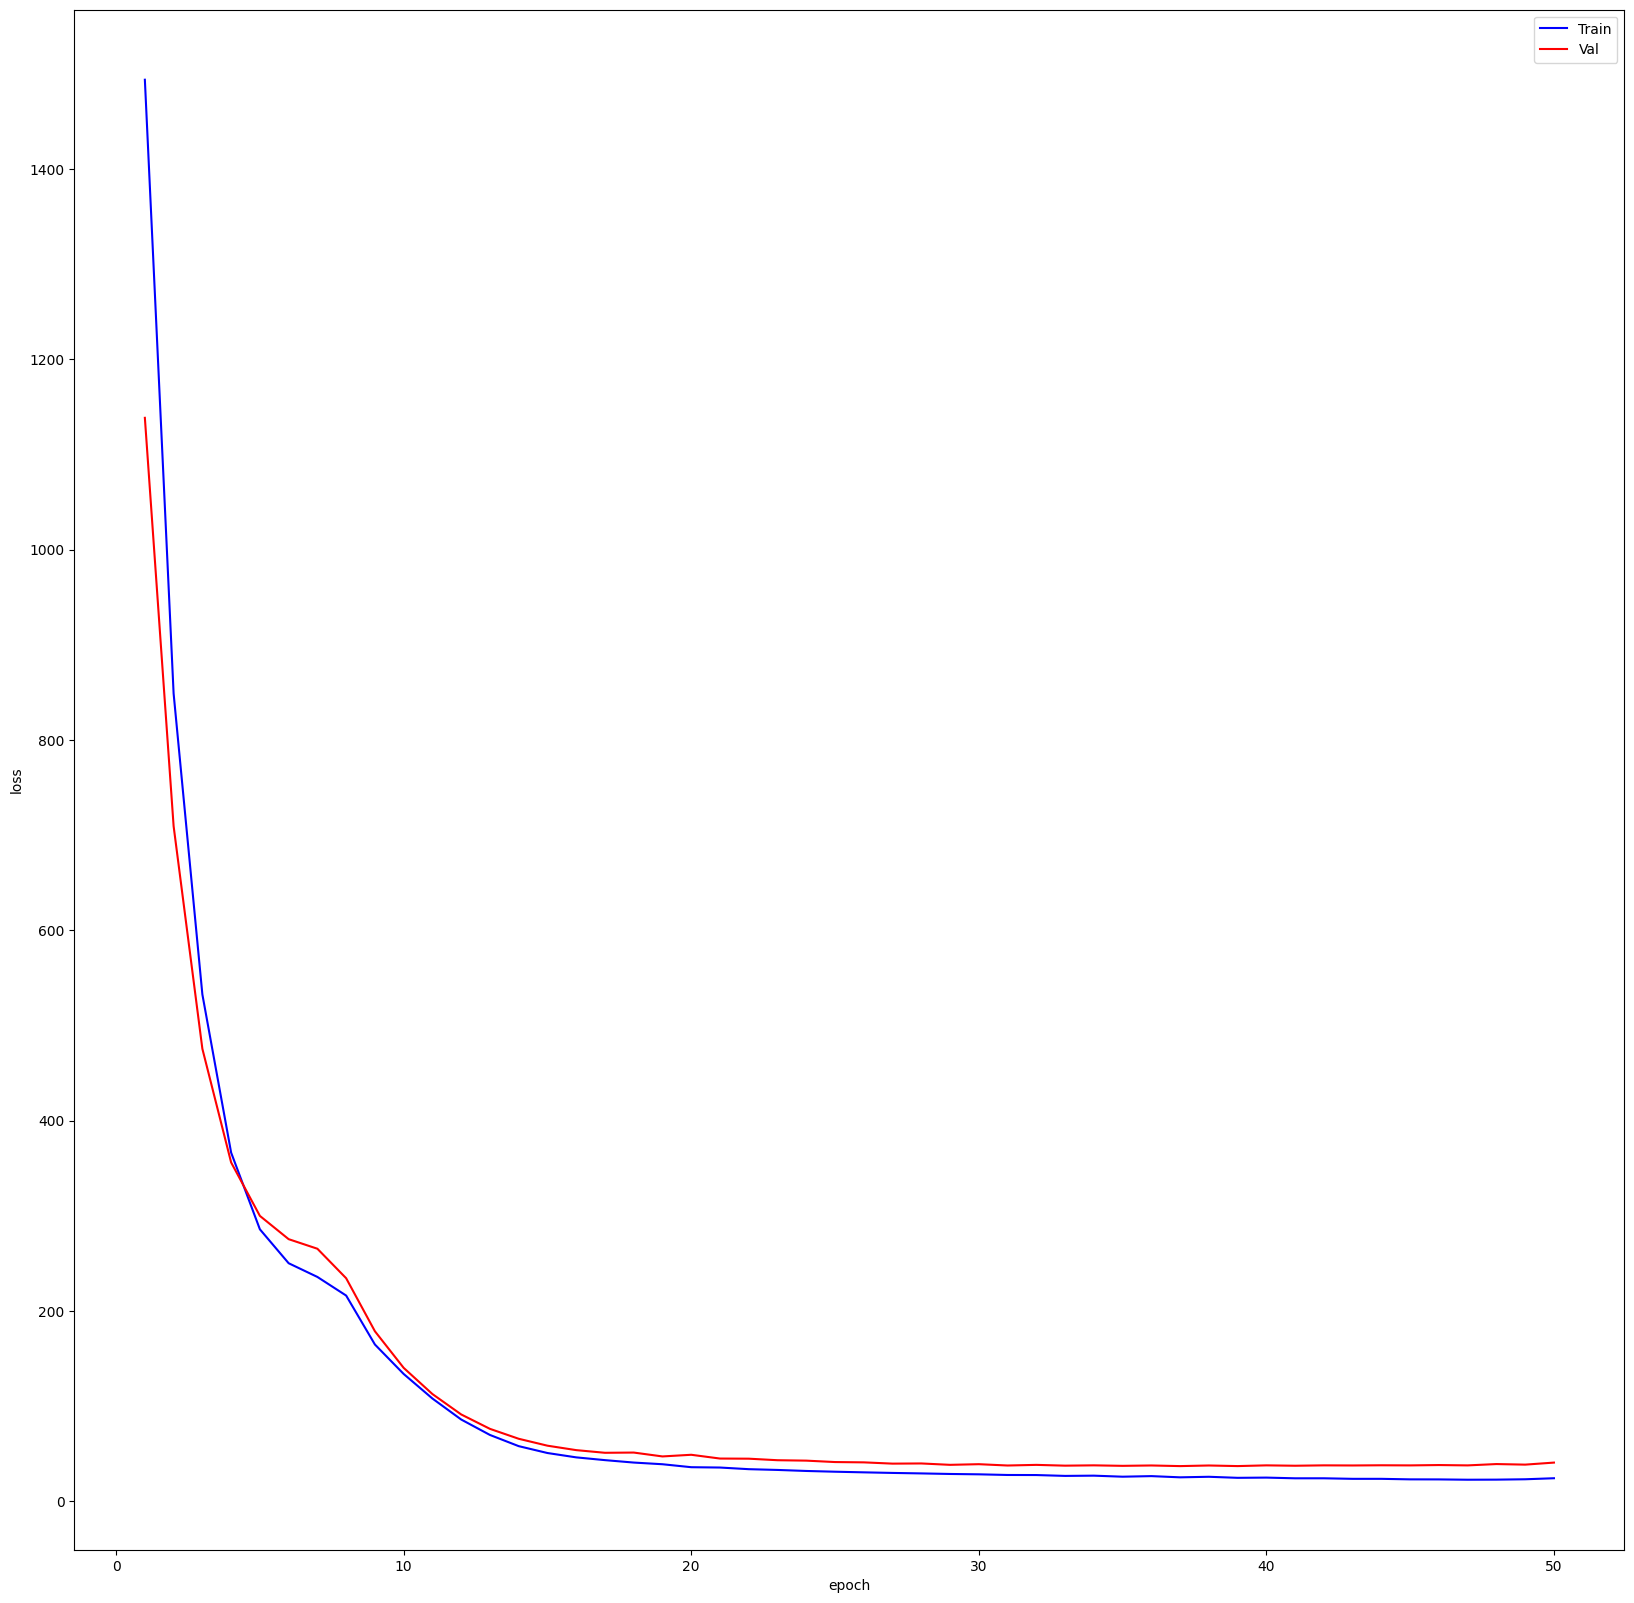

In [48]:
train_loss_all=[]
val_loss_all = [] 
input_size = 19
hidden_size = 16
num_epochs = 50
lr = 0.001
decay = 0.0001

model=LSTM(input_size,hidden_size)
optimizer= optim.Adam(model.parameters(),lr= lr, weight_decay= decay)
for epoch in range(1, num_epochs + 1):
    train_loss = train(model,optimizer,train_loader)
    train_loss_all.append(train_loss)
    print("for epoch {}, train loss is {}".format(epoch,train_loss))
    val_loss = validation(model,test_loader)
    val_loss_all.append(val_loss)
    print("for epoch {}, validation loss is {}".format(epoch,val_loss))
plot_loss(train_loss_all,val_loss_all)

In [49]:
def plot_loss_after(train_loss,val_loss):
    """
    You may end up plotting the training loss and validation loss multiple times
    It is better to implement a plot function instead of rewriting the plotting steps
    """
    X=range(1,len(train_loss))
    plt.plot(X,train_loss[1:],"-b",label="Train")
    plt.plot(X,val_loss[1:],"-r",label="Val")
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

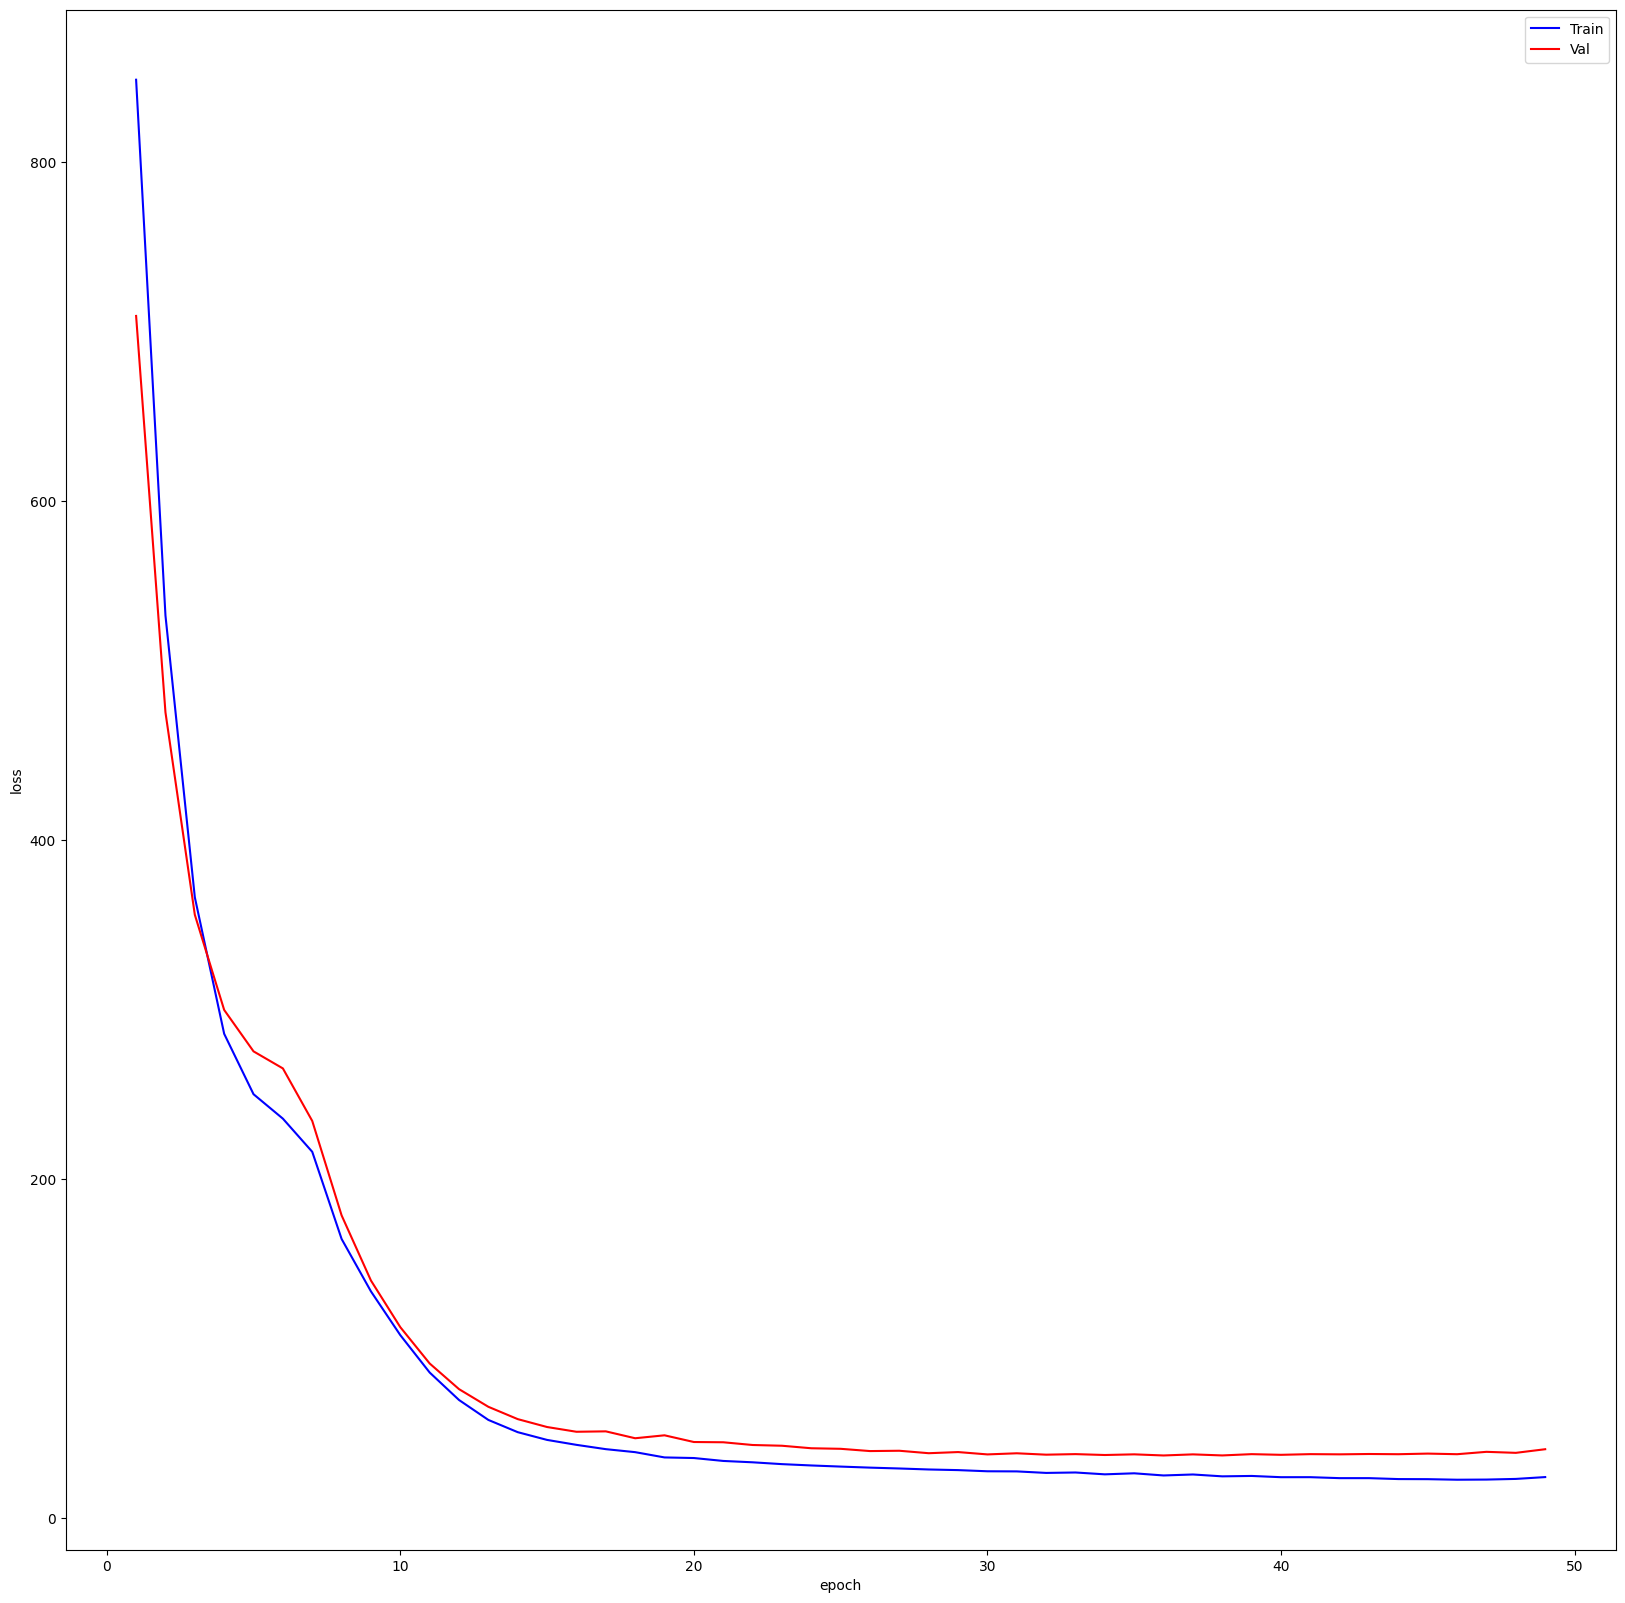

In [50]:
plot_loss_after(train_loss_all,val_loss_all)

# Predict and Model Performance

In [113]:
def predict(data_loader, model):

    output = torch.tensor([])
    input_y = torch.tensor([])
    model.eval()
    with torch.no_grad():
        for X, y in data_loader:
            y_star = model(X)
            input_y = torch.cat((input_y, y))
            output = torch.cat((output, y_star))
    
    return input_y,output



test_input,test_output= predict(test_loader, model)
test_input = test_input.numpy().flatten()
test_output = test_output.numpy().flatten()

train_input,train_output= predict(train_loader, model)
train_input = train_input.numpy().flatten()
train_output = train_output.numpy().flatten()

Text(0.5, 1.0, 'predict for train dataset')

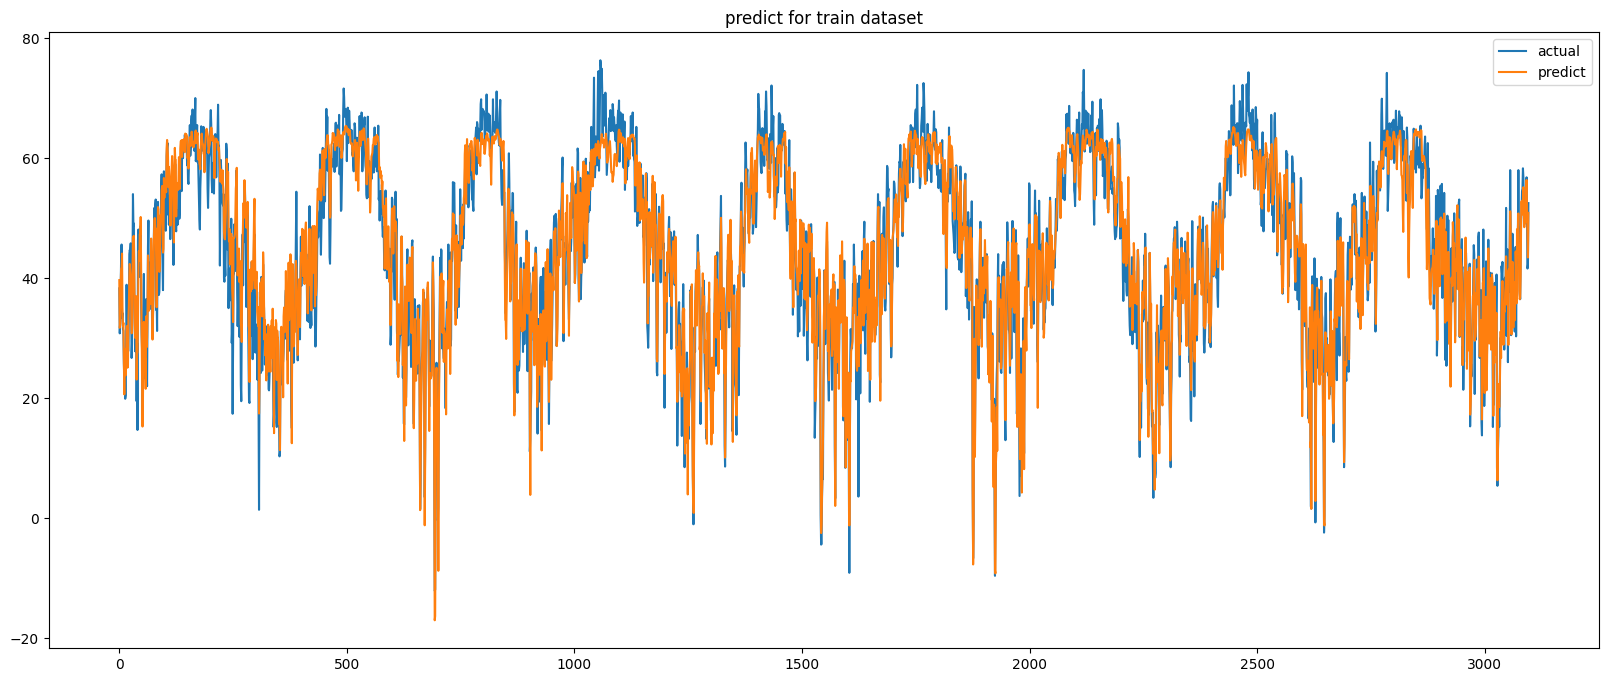

In [117]:
plt.figure(figsize=(20,8))
plt.plot(train_input)
plt.plot(train_output)
plt.legend(['actual','predict'])
plt.title('predict for train dataset')

Text(0.5, 1.0, 'predict for test dataset')

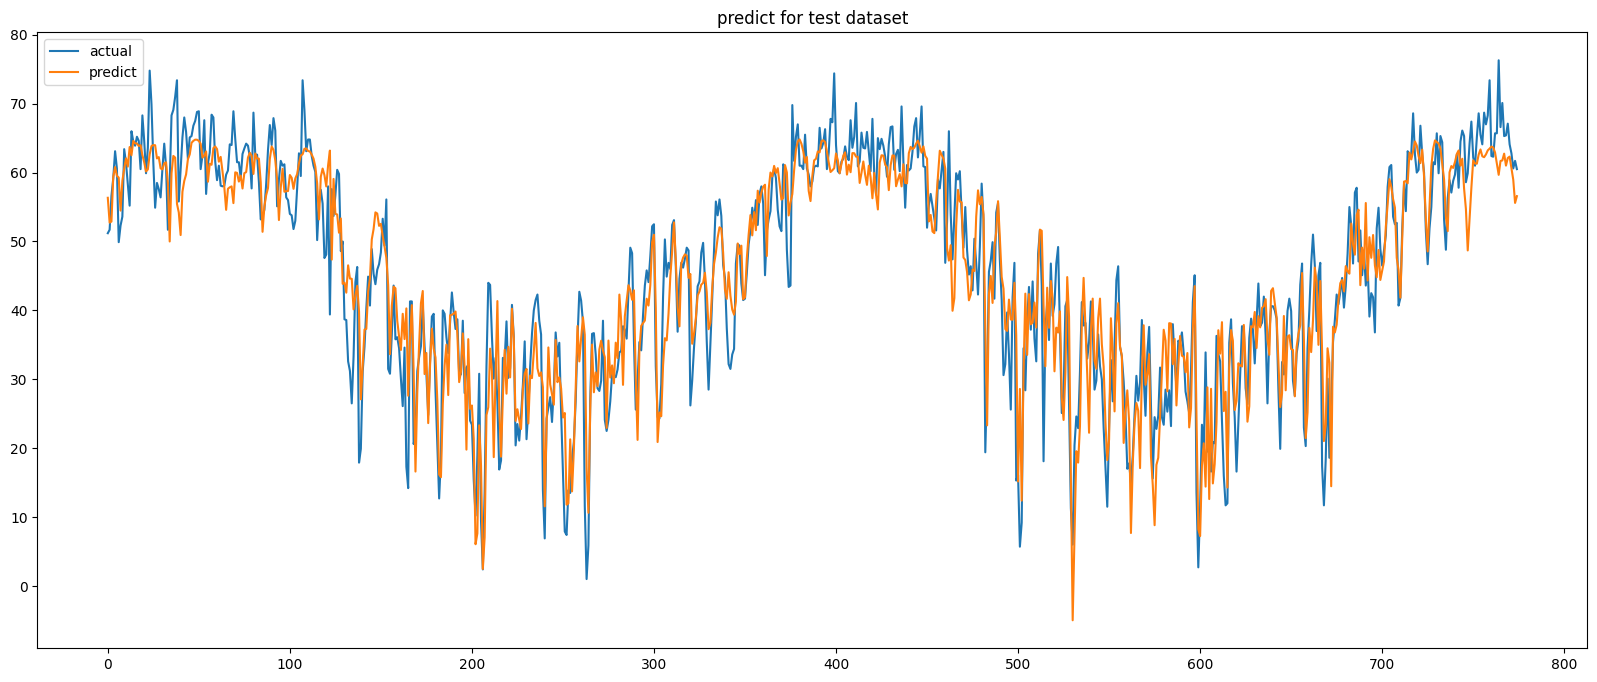

In [118]:
plt.figure(figsize=(20,8))
plt.plot(test_input)
plt.plot(test_output)
plt.legend(['actual','predict'])
plt.title('predict for test dataset')